# Student Performance Prediction

This project predicts students' final grades using features like study time, attendance, and past performance. A Random Forest Regressor is used to build the prediction model.


Import Libraries

In [2]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


 Load Dataset

In [75]:
# Load dataset
df = pd.read_csv('student-mat.csv', sep=';')


Preprocess the Data


In [76]:
# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [77]:
# View first few rows
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


Data Visualization

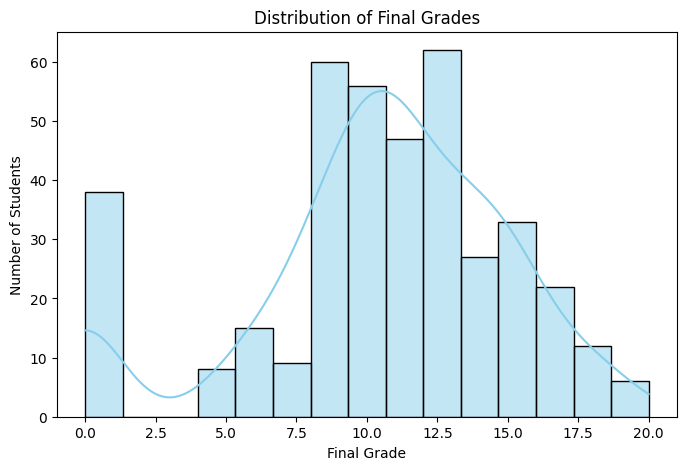

In [78]:
# Distribution of final grade (G3)
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.show()


Feature Selection

In [79]:
features = ['studytime', 'failures', 'absences', 'G1', 'G2']

# Define input and output
X = df[features]
y = df['G3']


Data Splitting

In [80]:
# training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [81]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Model Evaluation

In [82]:
# Predict on the test set
y_pred = model.predict(X_test)

# Import the required metrics
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 and RMSE manually
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Print the results
print("R2 Score:", round(r2, 3))
print("Root Mean Squared Error:", round(rmse, 3))


R2 Score: 0.873
Root Mean Squared Error: 1.617


Prredict Final Grade

In [83]:
# Function to predict final grade (matching training features only)
def predict_grade(studytime, failures, absences, G1, G2):
    input_df = pd.DataFrame([[studytime, failures, absences, G1, G2]],
                            columns=['studytime', 'failures', 'absences', 'G1', 'G2'])
    return round(model.predict(input_df)[0], 2)

# Example-1 prediction input
predicted = predict_grade(2, 0, 4, 15, 14)
print("Predicted Final Grade:", predicted)


Predicted Final Grade: 14.03


Example Prediction

In [84]:
#Example-2 prediction input
predicted = predict_grade(3, 1, 2, 12, 13)
print("Predicted Final Grade:", predicted)


Predicted Final Grade: 13.07
